In [25]:
import IPython
import cv2

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

## 가장자리 검출
밝기가 큰 폭으로 변하는 지점을 감지.  
미분과 기울기 연산 등을 수행함. (sobel, laplacian, canny)  
단순 변화량 감지이므로 배경과 큰 밝기 차이 등이 없으면 정확도가 떨어질 수 있음.

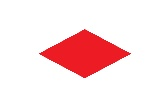

In [26]:
src = cv2.imread('rectangle.png')
src = cv2.resize(src, dsize=(0,0), fx=0.1, fy=0.1)
imshow(src)

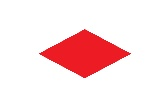

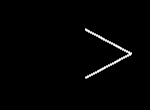

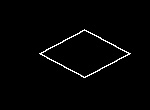

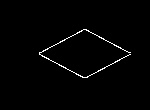

In [27]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray, ddepth=cv2.CV_8U, dx=1, dy=0, ksize=3)
laplacian = cv2.Laplacian(gray, ddepth=cv2.CV_8U, ksize=3)
canny = cv2.Canny(src, threshold1=100, threshold2=255)

imshow(src)
imshow(sobel)
imshow(laplacian)
imshow(canny)



## 다각형 근사

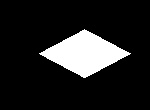

In [28]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
binary = cv2.bitwise_not(binary)
imshow(binary)

In [29]:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
print(contours)
print(hierarchy)

[array([[[ 84,  29]],

       [[ 82,  30]],

       [[ 80,  31]],

       [[ 73,  35]],

       [[ 46,  49]],

       [[ 44,  51]],

       [[ 39,  53]],

       [[ 42,  55]],

       [[ 45,  56]],

       [[ 47,  58]],

       [[ 57,  63]],

       [[ 73,  71]],

       [[ 81,  76]],

       [[ 83,  77]],

       [[ 85,  77]],

       [[ 90,  74]],

       [[ 99,  70]],

       [[116,  61]],

       [[118,  59]],

       [[127,  55]],

       [[130,  53]],

       [[128,  52]],

       [[124,  50]],

       [[117,  47]],

       [[100,  37]]], dtype=int32)]
[[[-1 -1 -1 -1]]]


approx_poly: [[[ 39  53]]

 [[ 83  77]]

 [[130  53]]

 [[ 84  29]]]


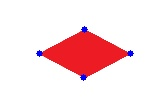

In [30]:
for contour in contours:
    epsilon = cv2.arcLength(contour, True) * 0.02
    approx_poly = cv2.approxPolyDP(contour, epsilon, True)

    print(f'approx_poly: {approx_poly}')

    for approx in approx_poly:
        cv2.circle(src, tuple(approx[0]), 3, (255, 0, 0), -1)

imshow(src)